<a href="https://colab.research.google.com/github/bandiamithsreenivasareddy/ml-lab/blob/main/ML_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

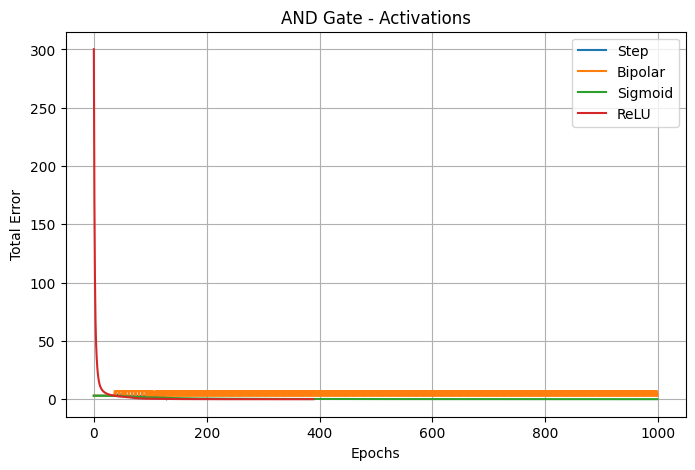

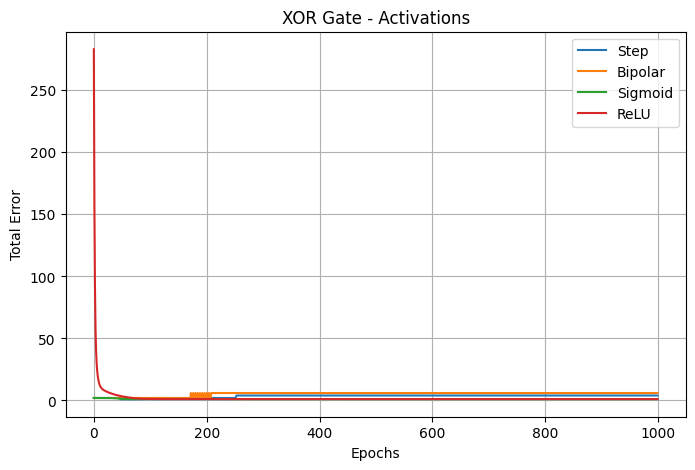

,Activation,Epochs
0,Step,130
1,Bipolar,1000
2,Sigmoid,1000
3,ReLU,390


,Activation,Epochs
0,Step,1000
1,Bipolar,1000
2,Sigmoid,1000
3,ReLU,1000


,LR,Epochs
0,0.1,68
1,0.2,37
2,0.3,23
3,0.4,23
4,0.5,19
5,0.6,19
6,0.7,15
7,0.8,14
8,0.9,13
9,1.0,12


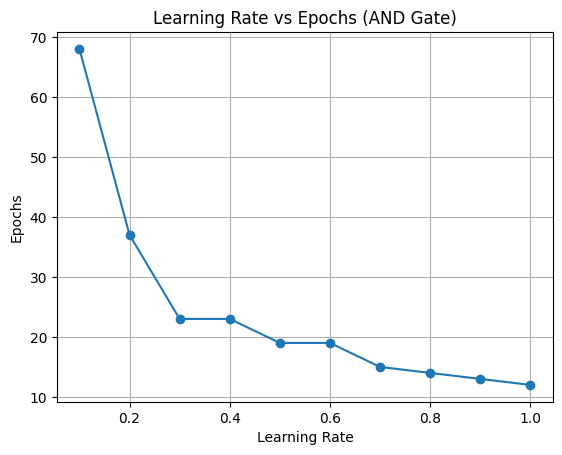

Customer Classification Weights: [-6.15347456 -3.92516429 11.02339253 -1.42400976  8.57696449], Epochs: 1000


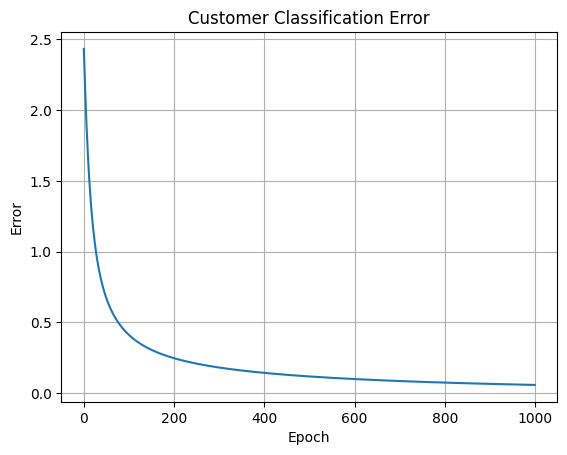

Pseudo-Inverse Accuracy: 60.00%
AND MLP (Backprop) Epochs: 1000


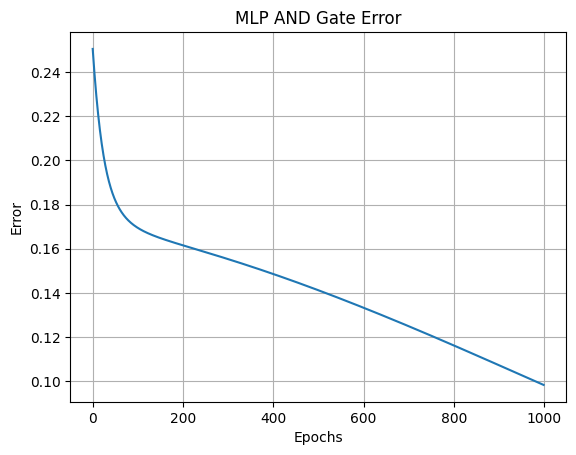

Dual Output Epochs (AND): 130


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier AND Score: 1.0
MLPClassifier XOR Score: 0.5
MLPClassifier Customer Score: 0.8


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [1]:
# Lab08: Complete Google Colab Code for All A-Tasks (22AIE213)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier

# ---------------------- Activation Functions --------------------------
def step(x): return 1 if x >= 0 else 0
def bipolar_step(x): return 1 if x >= 0 else -1
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))
def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x)**2
def relu(x): return np.maximum(0, x)
def relu_deriv(x): return 1. * (x > 0)
def leaky_relu(x): return x if x > 0 else 0.01 * x
def leaky_relu_deriv(x): return 1 if x > 0 else 0.01

# ---------------------- Summation & Error ----------------------------
def summation(inputs, weights): return np.dot(inputs, weights[1:]) + weights[0]
def calculate_error(y_true, y_pred): return 0.5 * (y_true - y_pred)**2

# ---------------------- Perceptron Training --------------------------
def train_perceptron(X, y, activation_fn, initial_weights, learning_rate, max_epochs=1000, threshold=0.002):
    weights = np.array(initial_weights, dtype=float)
    error_log = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            out = activation_fn(summation(X[i], weights))
            error = y[i] - out
            weights[1:] += learning_rate * error * X[i]
            weights[0] += learning_rate * error
            total_error += error**2
        error_log.append(total_error)
        if total_error <= threshold: break
    return weights, epoch + 1, error_log

# ---------------------- Plot Utility ---------------------------------
def plot_errors(error_logs, labels, title):
    plt.figure(figsize=(8,5))
    for err, label in zip(error_logs, labels):
        plt.plot(err, label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------------------- Data -----------------------------------------
and_data = np.array([[0,0],[0,1],[1,0],[1,1]])
and_labels = np.array([0,0,0,1])
xor_labels = np.array([0,1,1,0])

# ---------------------- A1 to A3: Perceptron with Activations --------
activations = {'Step': step, 'Bipolar': bipolar_step, 'Sigmoid': sigmoid, 'ReLU': relu}
initial_weights = [10, 0.2, -0.75]
learning_rate = 0.05

and_results, xor_results, and_errors, xor_errors = [], [], [], []
for name, fn in activations.items():
    w, e, err = train_perceptron(and_data, and_labels, fn, initial_weights, learning_rate)
    and_results.append({'Activation': name, 'Epochs': e})
    and_errors.append(err)
    w, e, err = train_perceptron(and_data, xor_labels, fn, initial_weights, learning_rate)
    xor_results.append({'Activation': name, 'Epochs': e})
    xor_errors.append(err)

plot_errors(and_errors, list(activations.keys()), "AND Gate - Activations")
plot_errors(xor_errors, list(activations.keys()), "XOR Gate - Activations")
display(pd.DataFrame(and_results))
display(pd.DataFrame(xor_results))

# ---------------------- A4: Learning Rate vs Epochs ------------------
lrs = np.arange(0.1, 1.1, 0.1)
lr_epochs = []
for lr in lrs:
    _, e, _ = train_perceptron(and_data, and_labels, step, initial_weights, lr)
    lr_epochs.append({'LR': round(lr,1), 'Epochs': e})
df_lr = pd.DataFrame(lr_epochs)
display(df_lr)
plt.plot(df_lr['LR'], df_lr['Epochs'], marker='o')
plt.title("Learning Rate vs Epochs (AND Gate)")
plt.xlabel("Learning Rate")
plt.ylabel("Epochs")
plt.grid(True)
plt.show()

# ---------------------- A6: Customer Classification ------------------
cust_data = {
    'Candies':[20,16,27,19,24,22,15,18,21,16],
    'Mangoes':[6,3,6,1,4,1,4,4,1,2],
    'Milk':[2,6,2,2,2,5,2,2,4,4],
    'Payment':[386,289,393,110,280,167,271,274,148,198],
    'High':[1,1,1,0,1,0,1,1,0,0]
}
df = pd.DataFrame(cust_data)
X_cust = df[['Candies','Mangoes','Milk','Payment']].values / np.max(df[['Candies','Mangoes','Milk','Payment']].values, axis=0)
y_cust = df['High'].values
weights, epochs, err = train_perceptron(X_cust, y_cust, sigmoid, [0.5]+[0.1]*4, 0.1)
print(f"Customer Classification Weights: {weights}, Epochs: {epochs}")
plt.plot(err)
plt.title("Customer Classification Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)
plt.show()

# ---------------------- A7: Pseudo-Inverse ---------------------------
X_pinv = np.insert(X_cust, 0, 1, axis=1)
W_pinv = np.linalg.pinv(X_pinv).dot(y_cust)
y_pred_pinv = sigmoid(X_pinv @ W_pinv) >= 0.5
acc = np.mean(y_pred_pinv == y_cust)
print(f"Pseudo-Inverse Accuracy: {acc * 100:.2f}%")

# ---------------------- A8: MLP (AND) w/ Backprop --------------------
def train_mlp_and():
    X = and_data
    y = and_labels.reshape(-1,1)
    input_size, hidden_size, output_size = 2, 2, 1
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    lr = 0.05
    error_log = []
    for epoch in range(1000):
        # Forward
        z1 = X @ W1 + b1
        a1 = sigmoid(z1)
        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)
        error = np.mean((y - a2)**2)
        error_log.append(error)
        if error <= 0.002: break
        # Backprop
        d2 = (a2 - y) * sigmoid_deriv(z2)
        d1 = d2 @ W2.T * sigmoid_deriv(z1)
        W2 -= lr * a1.T @ d2
        b2 -= lr * np.sum(d2, axis=0, keepdims=True)
        W1 -= lr * X.T @ d1
        b1 -= lr * np.sum(d1, axis=0, keepdims=True)
    return epoch + 1, error_log

epochs, err_log = train_mlp_and()
print(f"AND MLP (Backprop) Epochs: {epochs}")
plt.plot(err_log)
plt.title("MLP AND Gate Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.grid(True)
plt.show()

# ---------------------- A10: 2 Output Nodes --------------------------
Y_dual = np.array([[1,0],[1,0],[1,0],[0,1]])
def train_dual(X, y, activation_fn):
    weights = [np.array(initial_weights, dtype=float) for _ in range(2)]
    for epoch in range(1000):
        err = 0
        for i in range(len(X)):
            for j in range(2):
                out = activation_fn(summation(X[i], weights[j]))
                delta = y[i][j] - out
                weights[j][1:] += learning_rate * delta * X[i]
                weights[j][0] += learning_rate * delta
                err += delta**2
        if err <= 0.002: break
    return epoch + 1
print(f"Dual Output Epochs (AND): {train_dual(and_data, Y_dual, step)}")

# ---------------------- A11/A12: scikit-learn MLPClassifier ----------
clf_and = MLPClassifier(hidden_layer_sizes=(), activation='logistic', max_iter=1000)
clf_and.fit(and_data, and_labels)
print("MLPClassifier AND Score:", clf_and.score(and_data, and_labels))
clf_xor = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', max_iter=1000)
clf_xor.fit(and_data, xor_labels)
print("MLPClassifier XOR Score:", clf_xor.score(and_data, xor_labels))
clf_cust = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', max_iter=1000)
clf_cust.fit(X_cust, y_cust)
print("MLPClassifier Customer Score:", clf_cust.score(X_cust, y_cust))
